
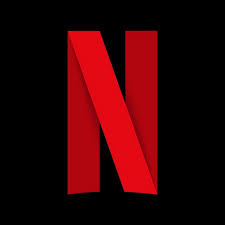

In [ ]:
#@title Project
import requests
from IPython.display import Image, display
from IPython.display import HTML

# Direct image URL
image_url = "https://drive.google.com/uc?export=view&id=1IISvQY58893ODLfUSBV8PPYlTsexOMba"

# Download the image
response = requests.get(image_url)
with open('image.jpg', 'wb') as file:
    file.write(response.content)

import base64

# Convert the image to a base64 string
with open("image.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()

# Create the HTML code with the base64 image
html_code = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Portfolio Header</title>
    <!-- Include Font Awesome -->
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0-beta3/css/all.min.css">
    <style>
        body {{
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
        }}
        .header {{
            display: flex;
            align-items: flex-start; /* Align items to the top */
            /*align-items: center;*/
            padding: 20px;
            background-color: #f4f4f4;
            border-bottom: 2px solid #ccc;
        }}
        .header img {{
            border-radius: 50%;
            width: 100px;
            height: 100px;
            object-fit: cover;
            margin-right: 20px;
            box-shadow: 0 0 20px brown; /* Glowing effect */
            vertical-align: top;
        }}
        .header .text-container {{
            display: flex;
            flex-direction: column;
        }}
        .header h1 {{
            margin: 0;
            font-size: 2em;
            color: #454545;
        }}
        .header p {{
            margin: 5px 0 0 0;
            font-size: 1em;
            color: #666;
        }}
        .header .social-icons {{
            margin-top: 10px;
        }}
        .header .social-icons a {{
            margin-right: 10px;
            color: #666;
            text-decoration: none;
            font-size: 1.5em;
        }}
        .header .social-icons a:hover {{
            color: #000;
        }}
    </style>
</head>
<body>
    <header class="header">
        <img src="data:image/jpeg;base64,{encoded_string}" alt="Profile Picture">
        <div class="text-container">


            <h1>Netflix Content Analysis: Movies vs TV Shows</h1>

            <p>Tandra Malm</p>

            <div class="social-icons">


                <a href="https://www.linkedin.com/in/tandra-malm-89a373128/" target="_blank"><i class="fab fa-linkedin"></i></a>
                <a href="mailto:tandra_malm@hotmail.com"><i class="fas fa-envelope"></i>



            </div>
        </div>
    </header>
</body>
</html>
"""

# Display the HTML code in the Jupyter/Colab notebook
display(HTML(html_code))

# Soft skills

##Step 1. Kick-off meeting with management

Imagine you've just joined a media insights consultancy that works with streaming platforms to help them understand viewer content preferences. One of your clients is a growing streaming service looking to better understand how their library compares to global trends — particularly Netflix, the market leader.

They’re trying to decide what types of content to invest in — should they prioritize producing more TV shows or movies? Should they focus on content in certain countries or genres? And what content ratings (like PG-13, TV-MA, etc.) appeal to a broader audience?

They’ve asked your team to analyze Netflix's publicly available dataset to uncover key insights. Your job is to clean and explore the data, use SQL to slice and filter it, and present your findings in Tableau through clear visualizations.

The goal is to help the client answer:

- What’s the distribution of content type over the years?

- Which countries produce the most content on Netflix?

- How does content rating vary by type (Movie vs TV Show)?

- Are there shifts in what kinds of content Netflix has been releasing?

##Step 2. Documenting a task during a meeting

###Meeting documentation template

**Goal**: Analyze the Netflix catalog to uncover insights about content types, release trends, and popular genres

**Visualisation**
(bar, pie, column etc.):

<figure>
  <left>
    <img src='https://drive.google.com/uc?export=view&id=15fIbp6qRXgfL6vHfpkPkIG4zCv15qxiD' width='400'/>
    <figcaption>Popular types of visuals</figcaption>
  </left>
</figure>


- Bar plot 1: Number of Movies vs TV Shows
  - Numeric column and aggregation: COUNT(title)
  - Categorical column: type
  - Active filters: None


- Bar plot 2: Top 10 Countries with the Most Titles
  - Numeric column and aggregation: COUNT(title)
  - Categorical column: country
  - Active filters: top 10 by COUNT(title)

- Bar plot 3: Number of Titles Added Per Year by Type
  - Numeric column and aggregation: COUNT(title)
  - Categorical column 1: year_added
  - Active filters: Filter out null values in year_added

- Bar plot 4: Distribution of Ratings
  - Numeric column and aggregation: COUNT(title)
  - Categorical column: rating
  - Active filters: Filter out "unknown" in rating

#Hard skills

In [ ]:
# Step 1: Import the required libraries
import pandas as pd
import gdown

# Step 2: Google Drive File ID of the CSV
# Replace this ID with the actual one from your own Google Drive link
file_id = '1YQcvnGfbyVEpXUjBhLymMNcOPg3V2Z91'

# Step 3: Generate the download URL
download_url = f'https://drive.google.com/uc?id={file_id}'

# Step 4: Download the file to your environment
output_file = 'netflix_titles.csv'
gdown.download(download_url, output_file, quiet=False)

# Step 5: Load the CSV into a DataFrame
df = pd.read_csv(output_file)

# Step 6: Activate ipython-sql for SQL queries
%load_ext sql

# Step 7: Save the DataFrame to a SQLite database file
database_filename = 'netflix_titles.db'
df.to_sql('netflix_titles', f'sqlite:///{database_filename}', if_exists='replace', index=False)

# Step 8: Connect to the database using SQL magic
%sql sqlite:///netflix_titles.db

# Step 9: Fix for styling (as per recent notebook SQL change)
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

Downloading...
From: https://drive.google.com/uc?id=1YQcvnGfbyVEpXUjBhLymMNcOPg3V2Z91
To: /content/netflix_titles.csv
100%|██████████| 3.40M/3.40M [00:00<00:00, 134MB/s]


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [ ]:
#@title Step 2. SQL — Query the data
# Query the data to see if it works

project2_data = %sql SELECT type, title, country, release_year, rating FROM netflix_titles;

 * sqlite:///netflix_titles.db
   sqlite:///sales_data.db
Done.


In [ ]:
# Get the data to Python environment
# Convert project_data to pandas DataFrame
df = pd.DataFrame(project2_data)

#Display the first 10 rows of the DataFrame
print(df.head(10))

      type                             title  \
0    Movie              Dick Johnson Is Dead   
1  TV Show                     Blood & Water   
2  TV Show                         Ganglands   
3  TV Show             Jailbirds New Orleans   
4  TV Show                      Kota Factory   
5  TV Show                     Midnight Mass   
6    Movie  My Little Pony: A New Generation   
7    Movie                           Sankofa   
8  TV Show     The Great British Baking Show   
9    Movie                      The Starling   

                                             country  release_year rating  
0                                      United States          2020  PG-13  
1                                       South Africa          2021  TV-MA  
2                                               None          2021  TV-MA  
3                                               None          2021  TV-MA  
4                                              India          2021  TV-MA  
5              

In [ ]:
# Display basic info about the DataFrame
print("Basic DataFrame Info:")
df.info()
print("\n")

# Display summary statistics for numeric columns
print("Summary Statistics (Numeric Columns):")
print(df.describe())
print("\n")

# Display summary statistics for object (categorical) columns
print("Summary Statistics (Categorical Columns):")
print(df.describe(include='object'))
print("\n")

# Display number of missing values per column
print("Missing Values Per Column:")
print(df.isnull().sum())

Basic DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   country       7976 non-null   object
 3   release_year  8807 non-null   int64 
 4   rating        8803 non-null   object
dtypes: int64(1), object(4)
memory usage: 344.2+ KB


Summary Statistics (Numeric Columns):
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


Summary Statistics (Categorical Columns):
         type   title        country rating
count    8807    8807           7976   8803
unique      2    8807            748     17
top     Movie  Zubaan  United States  TV-MA
freq     6131       1           2818   3207


Missing Values Per Column:
type         

In [ ]:
# Replace missing values in 'country' column with 'Unknown'
df['country'].fillna('Unknown', inplace=True)

# Print the number of missing values remaining in the 'country' column
print("\nNumber of missing values in 'country' column:")
print(df['country'].isnull().sum())


Number of missing values in 'country' column:
0


<ipython-input-183-1f1764c44bb8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)


In [ ]:
# Export the DataFrame to an Excel file
df.to_excel('netflix_output.xlsx', index=False)

print("Data exported successfully to 'netflix_output.xlsx'")

Data exported successfully to 'netflix_output.xlsx'


In [ ]:
#@title Tableau Dashboard
from IPython.display import HTML

HTML("""
<div class='tableauPlaceholder' id='viz1749158537670' style='position: relative'><noscript><a href='#'><img alt='Netflix Titles Dashboard ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ne&#47;NetflixContentAnalysisMoviesvsTVShows&#47;NetflixTitlesDashboard&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='NetflixContentAnalysisMoviesvsTVShows&#47;NetflixTitlesDashboard' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ne&#47;NetflixContentAnalysisMoviesvsTVShows&#47;NetflixTitlesDashboard&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1749158537670');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1327px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
""")


[Link Tableau](https://public.tableau.com/views/NetflixContentAnalysisMoviesvsTVShows/NetflixTitlesDashboard?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

[Link PBI]()

**Goal**: Analyze the Netflix catalog to uncover insights about content types, release trends, and popular genres



**Assessment**: This analysis explores Netflix’s content library from 2000 to 2021, focusing on trends in content type, country of origin, and maturity ratings.

Content Type Over Time: From 2000 to 2020, Netflix consistently added more Movies than TV Shows annually. A notable shift occurred in 2021, when TV Shows surpassed Movies for the first time (315 vs. 277 titles). The years 2017 and 2018 marked the peak in Movie additions, indicating a historical prioritization of film content up until that shift.

Country Distribution: The United States overwhelmingly leads in content production on Netflix, surpassing the second-highest contributor, India, by 1,846 titles. This highlights the platform’s heavy reliance on U.S.-based content.

Rating Distribution by Type: Movies appear across all content ratings, while TV Shows are missing in four rating categories. However, TV Shows have more titles in family-friendly categories such as TV-Y and TV-Y7. In all other rating groups, Movies dominate.

Overall Content Split: Movies make up 69.62% of the total Netflix catalog, with TV Shows accounting for 30.38%, reinforcing the platform’s historical emphasis on film content.




**Quick Summary Notes**:

- From 2000–2021, Netflix added more Movies than TV Shows each year.

- In 2021, TV Shows surpassed Movies in yearly additions.

- 2017 & 2018 saw the biggest spike in Movie releases.

- The United States produces the most content on Netflix—far more than any other country.

- Movies appear in all rating categories; TV Shows are missing in four.

- TV Shows have more titles in family-friendly ratings (TV-Y, TV-Y7).

- Overall content split:

  - Movies = 69.62%

  - TV Shows = 30.38%
